In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import train_test_split

from sklearn.metrics import classification_report

seed = 12

In [2]:
variables = ["id", "RI", "Na", "Mg", "Al", "Si", "K", "Ca", "Ba", "Fe", "Type"]

df = pd.read_csv('glass.data', header=None)
df.columns = variables

# Replace label 7 by 4 and to have only labels from 1 to 6
print(df["Type"].unique())

df["Type"] = df["Type"].replace(7, 4)
df["Type"] = df["Type"].add(-1)

print(df["Type"].unique())

features = df.drop(["Type"], axis=1)
features.head()

target = df["Type"]

[1 2 3 5 6 7]
[0 1 2 4 5 3]


In [3]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.25, random_state=seed) # 70% training and 30% test

## Decision Tree

In [18]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(splitter="random", criterion="entropy", max_depth=3)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

In [19]:
# Predict the response for test dataset
y_pred_dt = clf.predict(X_test)

In [20]:
print(classification_report(y_test, y_pred_dt))

              precision    recall  f1-score   support

           0       1.00      0.93      0.97        15
           1       0.76      1.00      0.86        19
           2       0.00      0.00      0.00         2
           3       0.85      1.00      0.92        11
           4       1.00      1.00      1.00         2
           5       0.00      0.00      0.00         5

    accuracy                           0.85        54
   macro avg       0.60      0.66      0.62        54
weighted avg       0.75      0.85      0.80        54



c:\programdata\miniconda3\envs\projet_stat\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\programdata\miniconda3\envs\projet_stat\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\programdata\miniconda3\envs\projet_stat\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


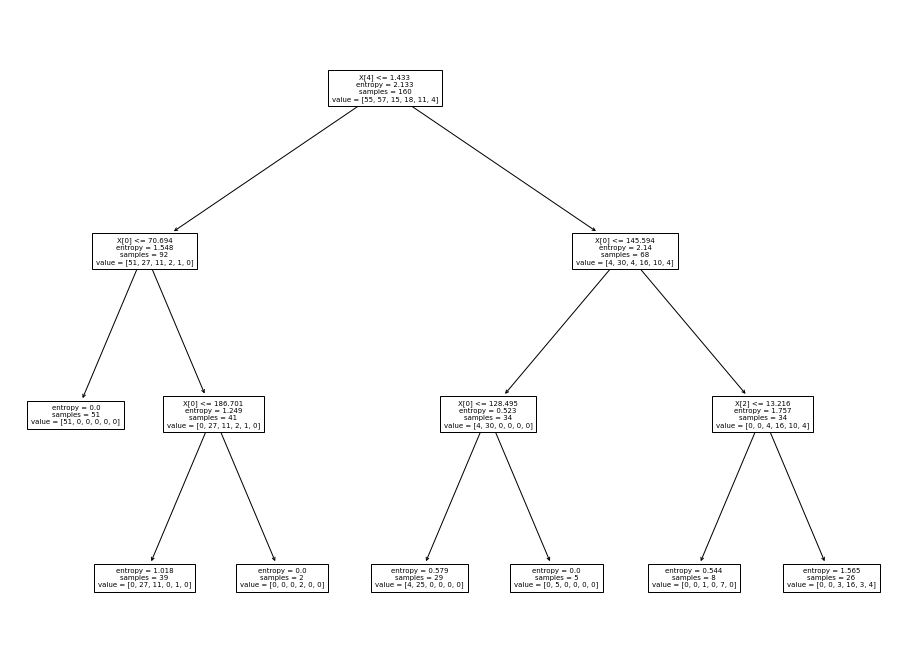

In [21]:
fig, ax = plt.subplots(figsize=(16,12))
plot_tree(clf,ax=ax, fontsize=7)
plt.show()

## Bootstrap ( = bagging) assembling

In [15]:
bootsrap_clf = BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=3, random_state=seed, n_jobs=-1)

# Train Decision Tree Classifer with Bootstrap
bootsrap_clf = bootsrap_clf.fit(X_train,y_train)

In [16]:
# Predict the response for test dataset
y_pred_bs = clf.predict(X_test)

In [17]:
print(classification_report(y_test, y_pred_bs))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.94      0.89      0.92        19
           2       0.50      1.00      0.67         2
           3       1.00      0.82      0.90        11
           4       0.67      1.00      0.80         2
           5       1.00      1.00      1.00         5

    accuracy                           0.93        54
   macro avg       0.85      0.95      0.88        54
weighted avg       0.95      0.93      0.93        54



An average of 93% of the test samples are well classified (see accuracy